# Deep Generative Models
## Homework 1
###Virginia Marcante - UIN: 664215958

In [3]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
import numpy as np
from matplotlib import pyplot as plt

import torch
import torchvision
from torch import optim
from torch import nn
from torch import distributions
from torch.utils.data import DataLoader 
from torch.nn import functional as F
from torchvision import transforms as T
from NADE import *
from PixelRNN import *
from Transformer import *

Choose first the model you want to train:

In [10]:
model = NADE(input_dim=784, hidden_dim=500)

In [8]:
model = PixelRNN(num_layers=2, hidden_dims=16, input_size=28)

In [3]:
model = Transformer()

In [ ]:
batch_size = 100
transforms = T.Compose([T.Lambda(lambda t : np.round((np.array(t) / 27)).astype(int)), T.ToTensor()])

training_data = torchvision.datasets.FashionMNIST("dataset", download=True, train=True, transform=transforms)
test_data = torchvision.datasets.FashionMNIST("dataset", download=True, train=False, transform=transforms)

train_loader = DataLoader(training_data, shuffle=True, batch_size=batch_size, num_workers=8)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1, num_workers=8)

optimizer = optim.Adam(model.parameters())


n_epochs = 5
train_loss = []
eval_loss = []
for epoch in range(1, n_epochs + 1):
  epochs_loss = []

  for image, _ in train_loader:

    l = [1, 2, 3]
    #x = torch.Tensor(image)
    #optimizer.zero_grad()
    #y_pred = model(x.float())
    #l = model.loss(x, y_pred)
    #epochs_loss.append(l)
    #l.backward()
    #optimizer.step()

  epoch_loss = np.mean(l)
  train_loss.append(epoch_loss)
  eval_epoch_loss = model.evaluation(test_loader)
  eval_loss.append(eval_epoch_loss)

  print (f"Epoch: {epoch}, Training Loss: {epoch_loss:.2f}, Evaluation Loss: {eval_epoch_loss:.2f}")

In [ ]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.plot(eval_loss, 'b-', label = 'Test loss')
ax.plot(train_loss, 'r-', label = 'Train loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
lgd = ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.2), ncol = 2, fancybox = True)
plt.savefig('interpolation.eps', format='eps', bbox_extra_artists = (lgd,), bbox_inches = 'tight') 
plt.show()

In [11]:
def draw_grid(imlist, m, n):
  fig, grid = plt.subplots(m,n) 
  for i in range(m):
    for j in range(n):
      grid[i,j].axis('off')
      grid[i,j].imshow(np.reshape(imlist[(i-1)*m+j], (28,28)))

Sampling for NADE


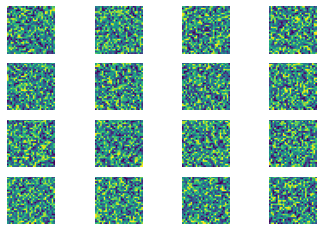

In [22]:
draw_grid(model.sample(16), 4, 4)

Sampling for Pixel RNN and Transformer

In [2]:
new_samples = torch.zeros(16, 28, 28)
for i in range(16):
  for j in range(28):
    for k in range(28):
      new_samples[i, j, k] = torch.multinomial(model.sample()[i, :, j, k].squeeze(), 1)
draw_grid(new_samples, 4, 4)

NameError: ignored